                         count        mean           std  min  25%  50%  75%  \
same_month_as_popular                                                          
Not Near Popular       12184.0  316.143631   2116.838688  0.0  0.0  0.0  0.0   
Near Popular           77434.0  980.459449  23272.764407  0.0  0.0  0.0  0.0   

                             max  
same_month_as_popular             
Not Near Popular         48458.0  
Near Popular           3236027.0  


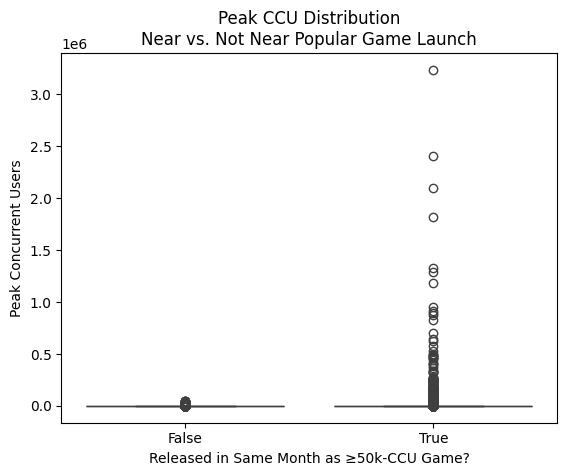

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the data ---------------------------------------------------------
df = pd.read_csv("../data/updated_steam_games.csv")                     # adjust path/filename as needed

# --- 2. Parse dates & create the flag ----------------------------------------
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_month"] = df["release_date"].dt.to_period("M")

popular_months = (
    df.loc[df["peak_ccu"] >= 50_000, "release_month"]
      .dropna()
      .unique()
)

df["same_month_as_popular"] = df["release_month"].isin(popular_months)

# --- 3. Distribution statistics ----------------------------------------------
summary = (
    df.groupby("same_month_as_popular")["peak_ccu"]
      .describe()
      .rename(index={False: "Not Near Popular", True: "Near Popular"})
)
print(summary)

# --- 4. Visualize -------------------------------------------------------------
sns.boxplot(data=df, x="same_month_as_popular", y="peak_ccu")
plt.title("Peak CCU Distribution\nNear vs. Not Near Popular Game Launch")
plt.xlabel("Released in Same Month as ≥50k‑CCU Game?")
plt.ylabel("Peak Concurrent Users")
plt.show()
